In [40]:
!pip install koreanize_matplotlib

In [41]:
# 공통 처리

# 불필요한 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 한글 글꼴 설정
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='Apple Gothic')

# 데이터프레임 출력용 함수
from IPython.display import display

# 숫자 출력 조정
# 넘파이 부동소수점 출력 자리수 설정
np.set_printoptions(suppress=True, precision=4)

# 판다스 부동소수점 출력 자리수 설정
pd.options.display.float_format = '{:.4f}'.format

# 데이터프레임 모든 필드 출력
pd.set_option("display.max_columns",None)

# 그래프 글꼴 크기 설정
plt.rcParams["font.size"] = 14

# 난수 시드
random_seed = 123

In [2]:
# 데이터 필드 정보
# 1. instant 인덱스 dteday 날짜(yy-mm-dd)
# 2. season 계절 (1: 겨울 2: 봄 3: 여름 4: 가을)
# 3. yr 연도 (0: 2011, 1:2012)
# 4. mnth 월 (1 - 12)
# 5. hr 시간 (0 - 23)
# 6. holiday 휴일
# 7. weekday 요일 (0 - 6)
# 8. workingday 근무일 (1: 근무일 0: 휴일)
# 9. weathersit 날씨 (1: 맑은뒤흐림 2: 안개 3: 약한비 4: 강한비)
# 10. temp 기온 (정규화됨)
# 11. atemp 체감기온 (정규화됨)
# 12. hum 습도 (정규화됨)
# 13. windspeed 풍속 (정규화됨)
# 14. casual 비가입유저 이용수
# 15. registered 가입유저 이용수
# 16. cnt 전체유저 이용수

In [3]:
# Data import

In [4]:
# # 데이터 집합 배포 페이지 URL
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'

# # 데이터를 내려받아 압축해제
# !wget $url -O Bike-Sharing-Dataset.zip | tail -n 1
# !unzip -o Bike-Sharing-Dataset.zip | tail -n 1

--2023-07-20 04:49:40--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase     [  <=>               ] 273.43K  1.06MB/s    in 0.3s    

2023-07-20 04:49:40 (1.06 MB/s) - ‘Bike-Sharing-Dataset.zip’ saved [279992]

  inflating: hour.csv                


In [43]:
# day.csv 파일을 데이터프레임으로 읽어들임
# 이때 날짜 필드를 parse_dates로 지정한다
df = pd.read_csv('day.csv', parse_dates=[1])

In [45]:
df.shape

(731, 16)

In [18]:
raw_train=pd.read_csv('/content/train.csv')
raw_test=pd.read_csv('/content/test.csv')

print('train shape:',raw_train.shape)
print('test shape:',raw_test.shape)
raw_train.head()

train shape: (10886, 12)
test shape: (6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.8400,14.3950,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.0200,13.6350,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.0200,13.6350,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.8400,14.3950,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.8400,14.3950,75,0.0000,0,1,1


In [19]:
train = raw_train.copy()
test = raw_test.copy()

In [20]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [21]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.8400,14.3950,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.0200,13.6350,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.0200,13.6350,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.8400,14.3950,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.8400,14.3950,75,0.0000,0,1,1


In [23]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.6600,11.3650,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.6600,13.6350,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.6600,13.6350,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.6600,12.8800,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.6600,12.8800,56,11.0014


In [25]:
train_columns = [
    '날짜', '계절', '휴일', '근무일', '날씨',
    '온도', '체감온도', '습도', '풍속',
    '비가입유저_이용수', '가입유저_이용수', '전체유저_이용수'
]

test_columns = [
    '날짜', '계절', '휴일', '근무일', '날씨',
    '온도', '체감온도', '습도', '풍속'
]

train.columns = train_columns
test.columns = test_columns

In [6]:
# # instant 필드는 일련번호이므로 제거한다
# # df = df.drop('instant', axis=1)

# # 우리말 필드명 정의

# columns = [
#     '날짜', '계절', '연도', '월', '휴일', '요일', '근무일', '날씨',
#     '온도', '체감온도', '습도', '풍속',
#     '비가입유저_이용수', '가입유저_이용수', '전체유저_이용수'
# ]

# # 필드명을 우리말 필드명으로 변경
# df.columns = columns

In [26]:
# 처음 다섯 줄을 화면에 출력
display(train.head())

# 마지막 다섯 줄을 화면에 출력
display(train.tail())

,날짜,계절,휴일,근무일,날씨,온도,체감온도,습도,풍속,비가입유저_이용수,가입유저_이용수,전체유저_이용수
0,2011-01-01 00:00:00,1,0,0,1,9.8400,14.3950,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.0200,13.6350,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.0200,13.6350,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.8400,14.3950,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.8400,14.3950,75,0.0000,0,1,1


,날짜,계절,휴일,근무일,날씨,온도,체감온도,습도,풍속,비가입유저_이용수,가입유저_이용수,전체유저_이용수
10881,2012-12-19 19:00:00,4,0,1,1,15.5800,19.6950,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.7600,17.4250,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.9400,15.9100,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.9400,17.4250,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.1200,16.6650,66,8.9981,4,84,88


In [8]:
# 데이터 전처리

In [27]:
# '날짜'와 '가입사용자_이용수' 필드만 추출해
# 필드명을 '날짜'는 ds, '가입사용자_이용수'는 y로
# 바꾼 새 데이터프레임 df를 생성한다

# 데이터프레임 사본을 생성
df2 = train.copy()

# '날짜'와 '가입사용자_이용수' 필드를 추출
df2 = df2[['날짜', '가입유저_이용수']]

# 필드명을 교체
df2.columns = ['ds', 'y']

# 결과 확인
display(df2.head())

,ds,y
0,2011-01-01 00:00:00,13
1,2011-01-01 01:00:00,32
2,2011-01-01 02:00:00,27
3,2011-01-01 03:00:00,10
4,2011-01-01 04:00:00,1


In [10]:
# 데이터 분할
# 데이터 분할은 간단하게 2012년 11월 1일을 기준으로 그 전의 데이터를 학습데이터 그 이후의 데이터는 검증 데이터로 삼는다.

In [28]:
# 분할 기준 날짜 mday
mday = pd.to_datetime('2012-11-1')

# 학습용 데이터의 index와 검증용 데이터의 index를 생성
train_index = df2['ds'] < mday
test_index = df2['ds'] >= mday

# 입력 데이터 분할
x_train = df2[train_index]
x_test = df2[test_index]

# 날짜 데이터 분할(그래프 출력용)
dates_test = df2['ds'][test_index]

In [29]:
df2.head()

,ds,y
0,2011-01-01 00:00:00,13
1,2011-01-01 01:00:00,32
2,2011-01-01 02:00:00,27
3,2011-01-01 03:00:00,10
4,2011-01-01 04:00:00,1


In [30]:
x_train.head()

,ds,y
0,2011-01-01 00:00:00,13
1,2011-01-01 01:00:00,32
2,2011-01-01 02:00:00,27
3,2011-01-01 03:00:00,10
4,2011-01-01 04:00:00,1


In [ ]:
# !pip install fbprophet

In [31]:
# 라이브러리 임포트
# from fbprophet import Prophet
from prophet import Prophet

# 모델 결정
# seasonality 파라미터를 3으로 설정하는 것이 중요
# 이번 데이터는 일 단위 데이터이므로 daily_seasonality는 불필요함
# weekly_seasonality와 daily_seasonality는
# True/False 외의 값으로도 지정할 수 있음 (삼각함수의 개수)
# seasonality_mode: additive(기본값) multiplicative

m1 = Prophet(yearly_seasonality=True, weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='multiplicative')

In [32]:
# 학습
m1.fit(x_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bn4pksw/_40m5b9w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bn4pksw/b1yh4_n7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24431', 'data', 'file=/tmp/tmp3bn4pksw/_40m5b9w.json', 'init=/tmp/tmp3bn4pksw/b1yh4_n7.json', 'output', 'file=/tmp/tmp3bn4pksw/prophet_model_oczfwbo/prophet_model-20230720054030.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [33]:
# 예측용 데이터 생성
# (날짜 필드 ds만 들어 있는 데이터프레임)
# 61은 예측을 원하는 기간의 일수(2012-11-1부터 2012-12-31까지) #Day를 뜻함
future1 = m1.make_future_dataframe(periods=61, freq='D')

# 결과 확인
display(future1.head())
display(future1.tail())

,ds
0,2011-01-01 00:00:00
1,2011-01-01 01:00:00
2,2011-01-01 02:00:00
3,2011-01-01 03:00:00
4,2011-01-01 04:00:00


,ds
10031,2012-12-15 23:00:00
10032,2012-12-16 23:00:00
10033,2012-12-17 23:00:00
10034,2012-12-18 23:00:00
10035,2012-12-19 23:00:00


In [34]:
# 예측
# 결과로 데이터프레임이 반환된다
fcst1 = m1.predict(future1)

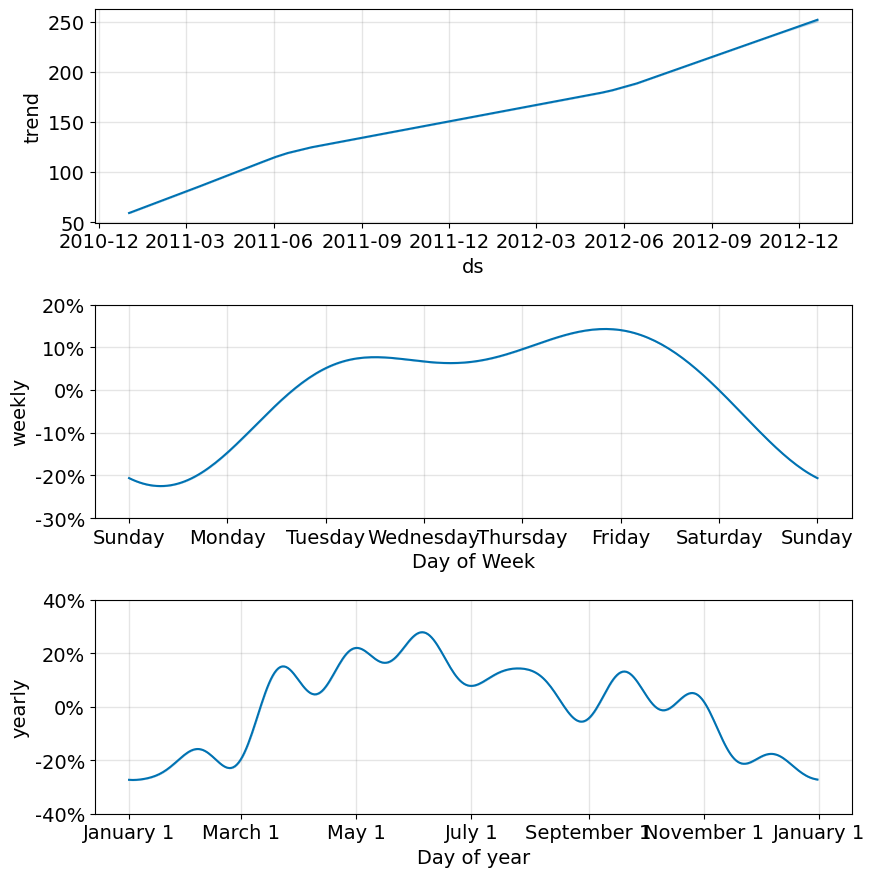

In [35]:
# 요소별 그래프 그리기
# 여기서는 트렌드, 주 단위 주기, 연 단위 주기
fig = m1.plot_components(fcst1)
plt.show()

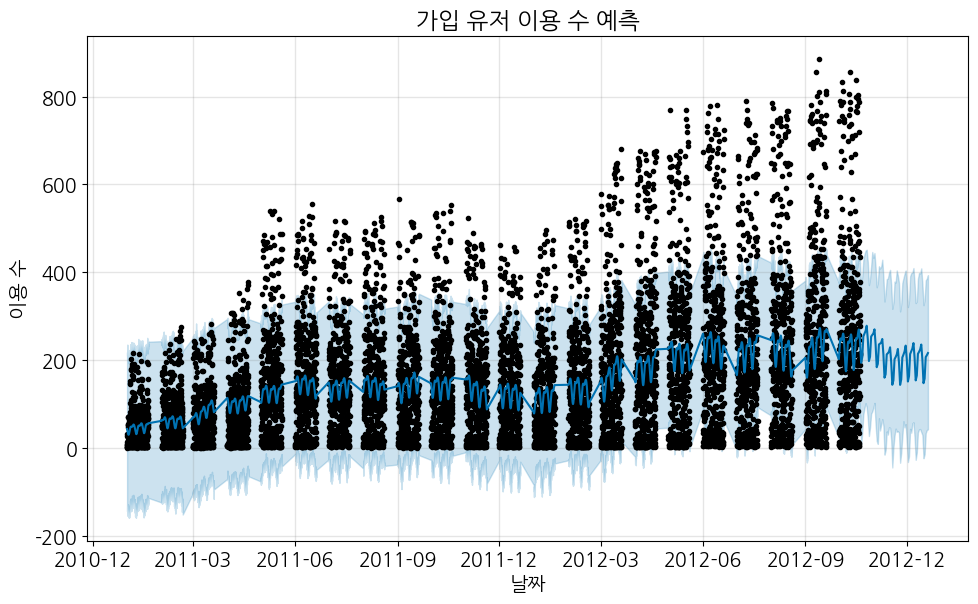

In [42]:
# 학습 데이터, 검증 데이터 전체를 그래프로 출력
fig, ax = plt.subplots(figsize=(10,6))

# 예측 결과를 그래프로 출력(프로펫 제공 함수)
m1.plot(fcst1, ax=ax)

# 제목 및 캡션 설정
ax.set_title('가입 유저 이용 수 예측')
ax.set_xlabel('날짜')
ax.set_ylabel('이용 수')

# 그래프 출력
plt.show()

In [ ]:
# ypred1: fcst1에서 예측 부분만 추출
ypred1 = fcst1[-61:][['yhat']].values

# ytest1: 예측 기간 중의 정답 데이터
ytest1 = x_test['y'].values

# R2값을 계산
from sklearn.metrics import r2_score
score = r2_score(ytest1, ypred1)

# 결과 확인
print(f'R2 score:{score:.4f}')

R2 score:0.3736


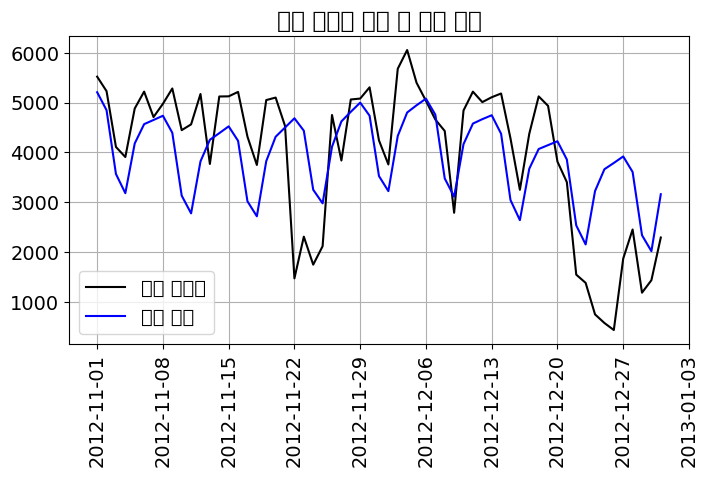

In [ ]:
# 시계열 그래프 그리기
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(8, 4))

# 그래프 그리기
ax.plot(dates_test, ytest1, label='정답 데이터', c='k')
ax.plot(dates_test, ypred1, label='예측 결과', c='b')

# 날짜 눈금 표시
# 목요일마다 날짜를 출력한다
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

# 날짜 표기를 90도 기울임
ax.tick_params(axis='x', rotation=90)

# 그리드 그리기
ax.grid()
ax.legend()
ax.set_title('가입 사용자 이용 수 예측 결과')

# 그래프 출력
plt.show()

In [ ]:
# 시계열 분석의 튜닝방법
# 1단계 : '휴일'의 영향을 반영
# 2단계 : 회귀 모델에 '날씨', '온도', '풍속', '습도'를 추가

In [ ]:
# 휴일에 해당하는 날짜 추출
df_holiday = df[df['휴일']==1]
holidays = df_holiday['날짜'].values

# 데이터프레임으로 변환
df_add = pd.DataFrame({'holiday': 'holi',
    'ds': holidays,
    'lower_window': 0,
    'upper_window': 0
})

# 결과 확인
display(df_add.head())
display(df_add.tail())

,holiday,ds,lower_window,upper_window
0,holi,2011-01-17,0,0
1,holi,2011-02-21,0,0
2,holi,2011-04-15,0,0
3,holi,2011-05-30,0,0
4,holi,2011-07-04,0,0


,holiday,ds,lower_window,upper_window
16,holi,2012-09-03,0,0
17,holi,2012-10-08,0,0
18,holi,2012-11-12,0,0
19,holi,2012-11-22,0,0
20,holi,2012-12-25,0,0


In [ ]:
# 휴일(df_add)을 모델에 반영하기

# 알고리즘 선택
# holidays 파라미터를 추가해 새로운 모델 m2를 생성한다
m2 = Prophet(yearly_seasonality=True,
    weekly_seasonality=True, daily_seasonality=False,
    holidays = df_add, seasonality_mode='multiplicative')

# 학습
m2 = m2.fit(x_train)

# 예측
fcst2 = m2.predict(future1)

DEBUG:cmdstanpy:input tempfile: /tmp/tmph6eljkvv/bff24tgj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6eljkvv/g0x3isa0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18848', 'data', 'file=/tmp/tmph6eljkvv/bff24tgj.json', 'init=/tmp/tmph6eljkvv/g0x3isa0.json', 'output', 'file=/tmp/tmph6eljkvv/prophet_modelqd80kado/prophet_model-20230719082108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:21:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:21:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


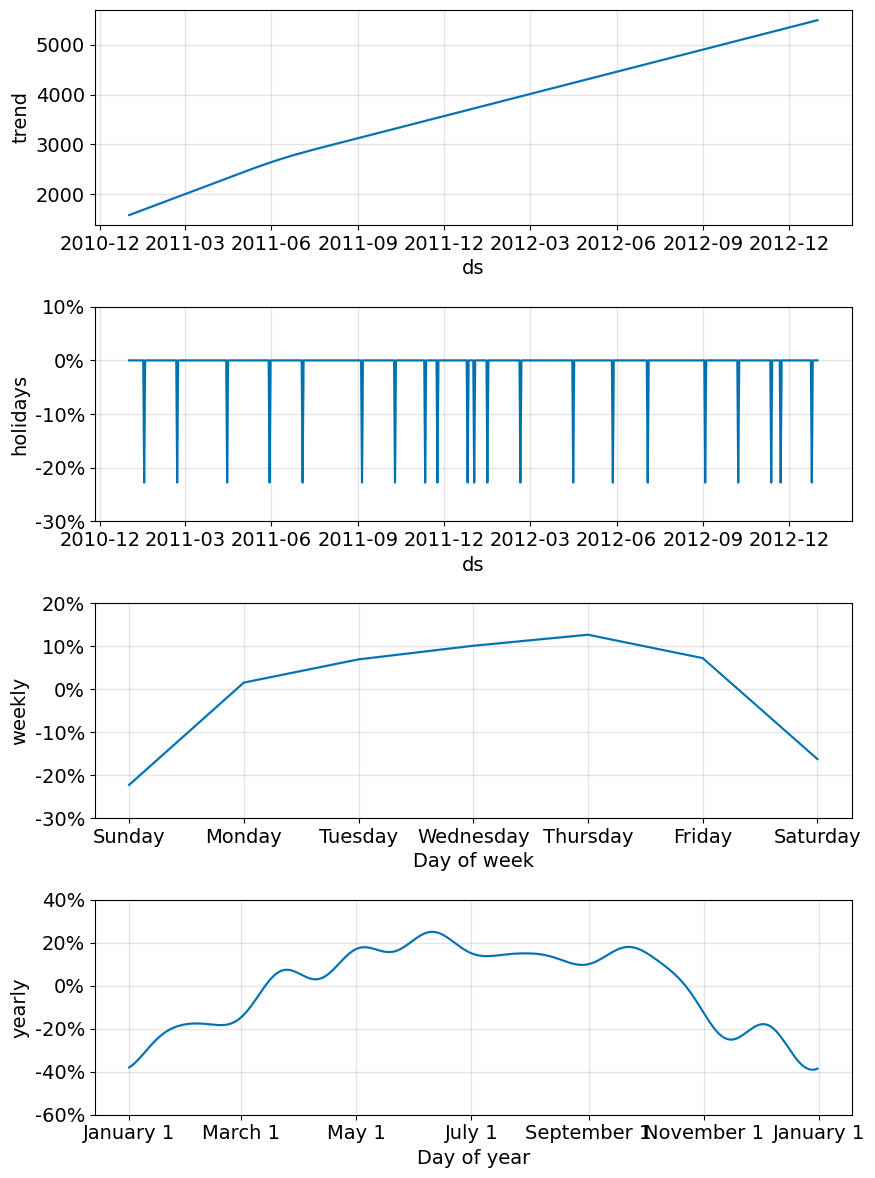

In [ ]:
# 요소별 그래프 그리기
fig = m2.plot_components(fcst2)
plt.show()

In [ ]:
# R2값 계산하기

# fcst2에서 예측 부분만을 추출
ypred2 = fcst2[-61:][['yhat']].values

# R2값 계산
score2 = r2_score(ytest1, ypred2)

# 결과 확인
r2_text2 = f'R2 score:{score2:.4f}'
print(r2_text2)

R2 score:0.4146


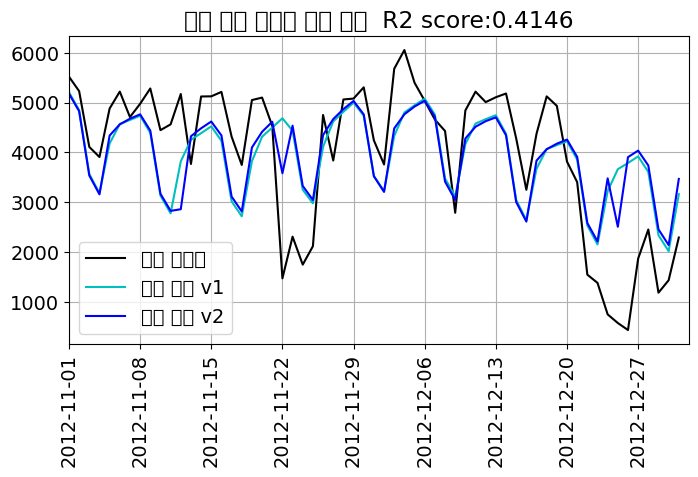

In [ ]:
# 시계열 그래프 그리기
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(8, 4))

# 그래프 그리기
ax.plot(dates_test, ytest1, label='정답 데이터', c='k')
ax.plot(dates_test, ypred1, label='예측 결과 v1', c='c')
ax.plot(dates_test, ypred2, label='예측 결과 v2', c='b')

# 날짜 눈금 표시
# 목요일마다 날짜를 출력한다
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

# 날짜 표기를 90도 기울임
ax.tick_params(axis='x', rotation=90)

# 시작일과 종료일
sday = pd.to_datetime('2012-11-1')
eday = pd.to_datetime('2013-1-1')
ax.set_xlim(sday, eday)

# 그리드 표시
ax.grid()
ax.legend()
ax.set_title('가입 유저 이용수 예측 결과  ' + r2_text2)

# 화면에 출력
plt.show()

In [ ]:
# 날씨', '온도', '풍속', '습도'를 예측 모델에 반영

In [ ]:
# 학습 데이터에 '날씨', '온도', '풍속', '습도'를 추가하기
df3 = pd.concat([df2, df[['날씨', '온도', '풍속', '습도']]], axis=1)

# 입력 데이터 분할
x2_train = df3[train_index]
x2_test = df3[test_index]

# 결과 확인
display(x2_train.tail())

,ds,y,날씨,온도,풍속,습도
665,2012-10-27,5209,2,0.5300,0.2357,0.7200
666,2012-10-28,3461,2,0.4775,0.3980,0.6946
667,2012-10-29,20,3,0.4400,0.3582,0.8800
668,2012-10-30,1009,2,0.3182,0.2130,0.8255
669,2012-10-31,5147,2,0.3575,0.1667,0.6667


In [ ]:
# 알고리즘 선택

m3 = Prophet(yearly_seasonality=True,
    weekly_seasonality=True, daily_seasonality=False,
    seasonality_mode='multiplicative', holidays = df_add)

# add_regressor 함수를 이용해  '날씨', '온도', '풍속', '습도'를 모델에 추가
m3.add_regressor('날씨')
m3.add_regressor('온도')
m3.add_regressor('풍속')
m3.add_regressor('습도')

# 학습
m3.fit(x2_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmph6eljkvv/5j5393xt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6eljkvv/yc959g0e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30805', 'data', 'file=/tmp/tmph6eljkvv/5j5393xt.json', 'init=/tmp/tmph6eljkvv/yc959g0e.json', 'output', 'file=/tmp/tmph6eljkvv/prophet_model59_unkc_/prophet_model-20230719082131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:21:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:21:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# 예측용 입력 데이터 생성
future3 = df3[['ds', '날씨', '온도', '풍속', '습도']]

# 예측
fcst3 = m3.predict(future3)

In [ ]:
### 튜닝 2단계의 평가

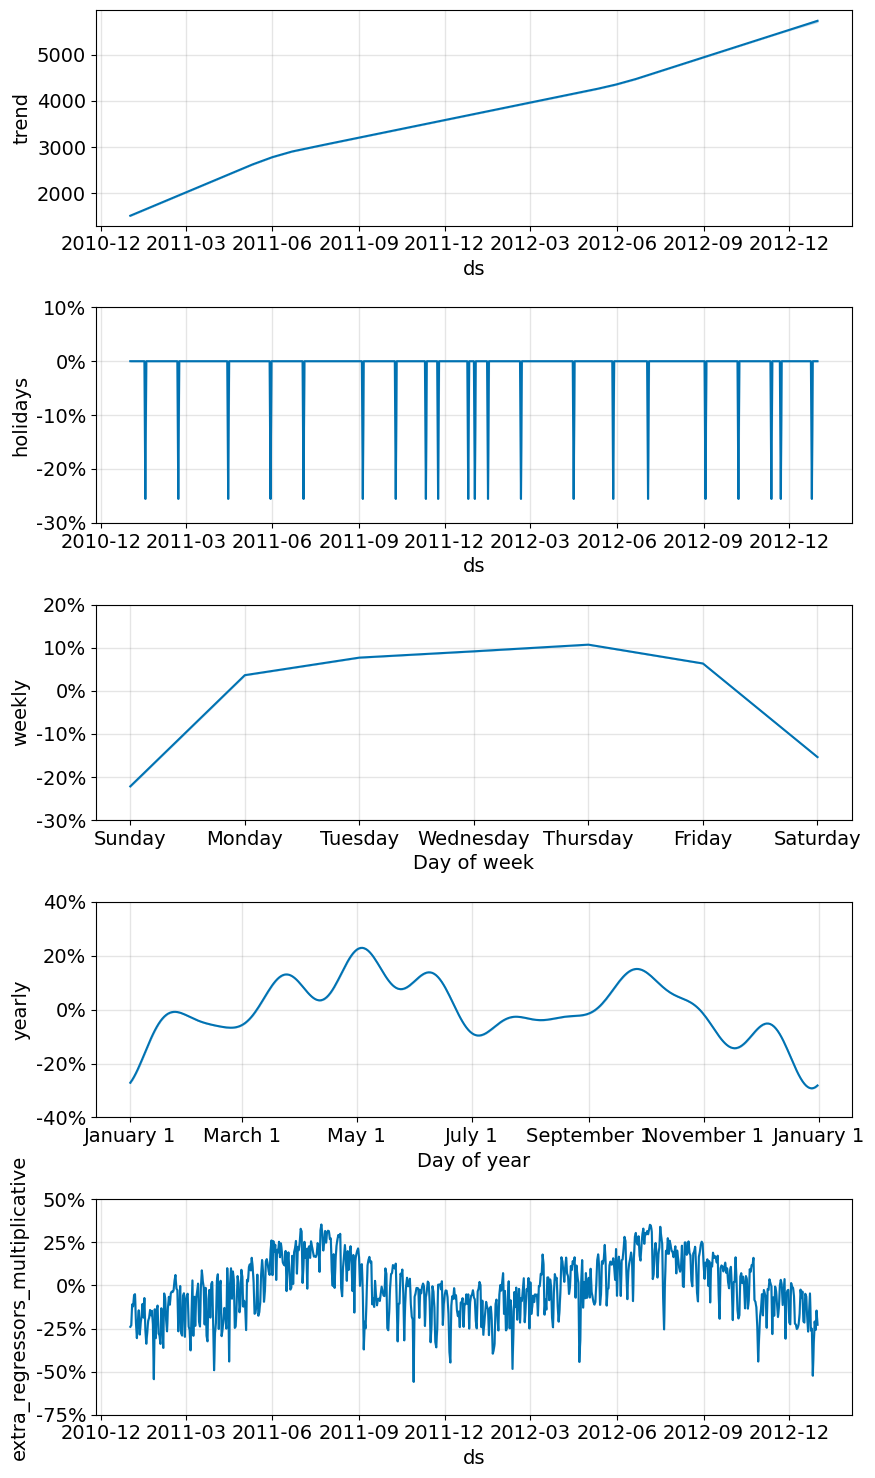

In [ ]:
# 요소별 그래프 그리기
fig = m3.plot_components(fcst3)
plt.show()

In [ ]:
# R2값 계산하기

# fcst에서 예측 부분만을 추출
ypred3 = fcst3[-61:][['yhat']].values
score3 = r2_score(ytest1, ypred3)

# 결과 확인
r2_text3 = f'R2 score:{score3:.4f}'
print(r2_text3)

R2 score:0.6196


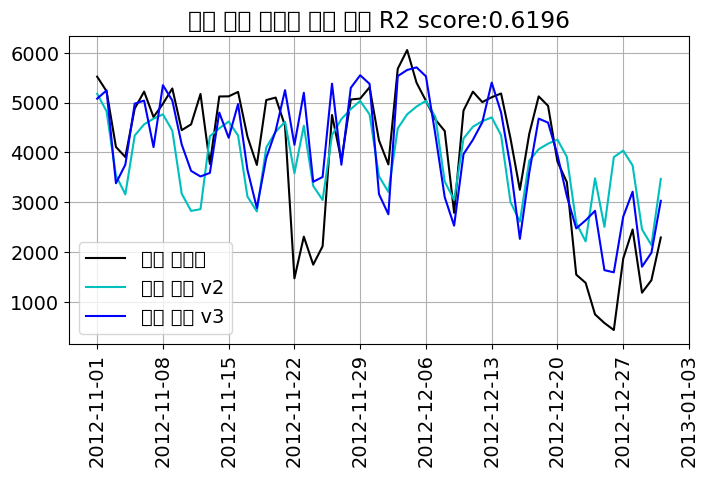

In [ ]:
# 시계열 그래프 그리기
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(8, 4))

# 그래프 그리기
ax.plot(dates_test, ytest1, label='정답 데이터', c='k')
ax.plot(dates_test, ypred2, label='예측 결과 v2', c='c')
ax.plot(dates_test, ypred3, label='예측 결과 v3', c='b')

# 날짜 눈금 표시
# 목요일마다 날짜를 출력한다
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

# 날짜 표기를 90도 기울임
ax.tick_params(axis='x', rotation=90)

# 그리드 표시
ax.grid()
ax.legend()
ax.set_title('가입 유저 이용수 예측 결과 ' + r2_text3)

# 화면에 출력
plt.show()

In [ ]:
# 칼럼 - 아이스크림 구매 예측 (시계열 분석)으로 정리

In [ ]:
# 데이터 읽어들이기
url2 = 'https://github.com/makaishi2/sample-data/blob/master/data/ice-sales.xlsx?raw=true'

df = pd.read_excel(url2, sheet_name=0)
df.columns = ['판매년월', '판매량']

In [ ]:
# 데이터 확인
display(df.head())
display(df.tail())

,판매년월,판매량
0,2015-01-01,401
1,2015-02-01,345
2,2015-03-01,480
3,2015-04-01,590
4,2015-05-01,928


,판매년월,판매량
55,2019-08-01,1513
56,2019-09-01,996
57,2019-10-01,724
58,2019-11-01,531
59,2019-12-01,584


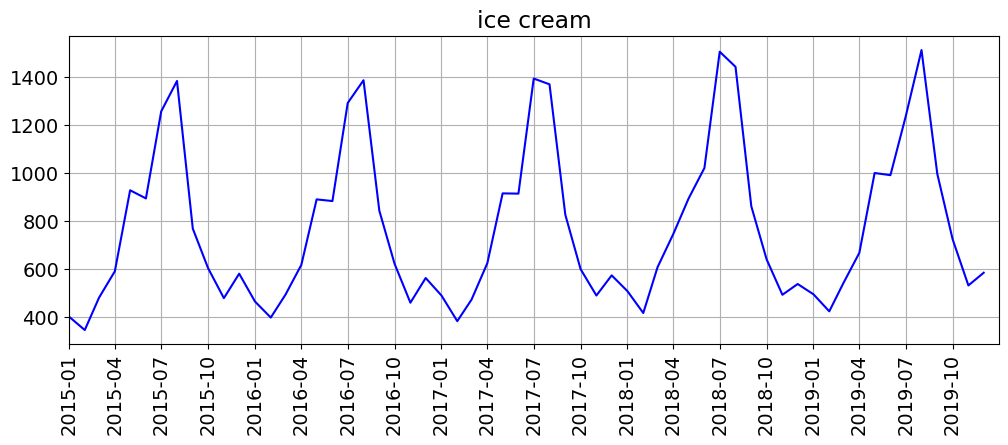

In [ ]:
# 시계열 그래프 그리기(아이스크림 지출 금액)
fig, ax = plt.subplots(figsize=(12, 4))

# 그래프 그리기
ax.plot(df['판매년월'], df['판매량'],c='b')

# 3개월 단위로 눈금 표시
month3 = mdates.MonthLocator(interval=3)
ax.xaxis.set_major_locator(month3)

# 날짜 표기를 90도 회전
ax.tick_params(axis='x', rotation=90)

# 시작일과 종료일
sday = pd.to_datetime('2015-1-1')
eday = pd.to_datetime('2019-12-31')
ax.set_xlim(sday, eday)

# 그리드 표시
ax.grid()
ax.set_title('ice cream')

# 화면에 출력
plt.show()

In [ ]:
# 데이터 전처리
# 데이터 형식을 프로멧에 맞춰 변경
x = df.copy()
x.columns = ['ds', 'y']
display(x.head())

,ds,y
0,2015-01-01,401
1,2015-02-01,345
2,2015-03-01,480
3,2015-04-01,590
4,2015-05-01,928


In [ ]:
# 데이터 분할
# 2019년 1월을 기준으로 학습 데이터와 검증 데이터를 분할
# 기준일 mday를 정의
mday = pd.to_datetime('2019-1-1')

# 학습 데이터 index와 검증 데이터 index를 생성
train_index = x['ds'] < mday
test_index = x['ds'] >= mday

# 입력 데이터 분할
x_train = x[train_index]
x_test = x[test_index]

# 날짜 필드도 그래프 작도를 위해 분할
dates_train = x['ds'][train_index]
dates_test = x['ds'][test_index]

In [ ]:
# 알고리즘 선택
# 라이브러리 임포트
#from fbprophet import Prophet
from prophet import Prophet

m = Prophet(yearly_seasonality=5, weekly_seasonality=False, daily_seasonality=False)


In [ ]:
# 학습
m = m.fit(x_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmph6eljkvv/dgtqmt49.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6eljkvv/ptgt3v0p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98418', 'data', 'file=/tmp/tmph6eljkvv/dgtqmt49.json', 'init=/tmp/tmph6eljkvv/ptgt3v0p.json', 'output', 'file=/tmp/tmph6eljkvv/prophet_modelll02zdqs/prophet_model-20230719082635.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:26:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:26:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# 예측
future = x[['ds']]
fcst = m.predict(future)

In [ ]:
# 평가

# fcst에서 예측 부분만을 추출
ypred = fcst[-12:]['yhat'].values

# 정답 데이터의 리스트
ytest = x_test['y'].values

# R2값 계산
from sklearn.metrics import r2_score
score = r2_score(ytest, ypred)
score_text = f'R2 score:{score:.4f}'
print(score_text)

R2 score:0.9566


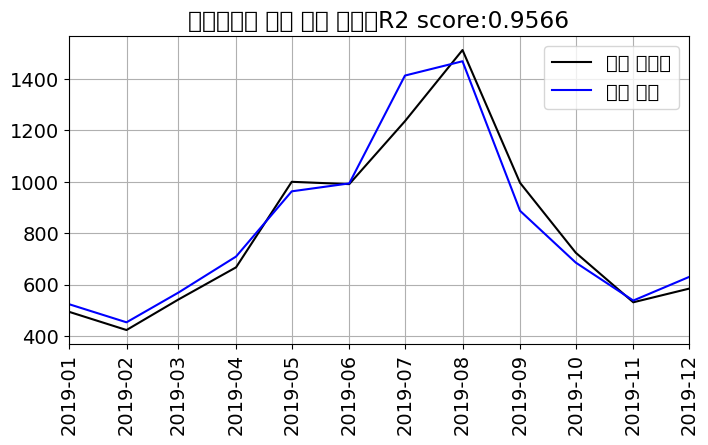

In [ ]:
# 시계열 그래프 그리기 (아이스크림 지출 금액)
fig, ax = plt.subplots(figsize=(8, 4))

# 그래프 그리기
ax.plot(dates_test, ytest, label='정답 데이터', c='k')
ax.plot(dates_test, ypred, label='예측 결과', c='b')

# 1개월 단위 눈금 표시
month = mdates.MonthLocator()
ax.xaxis.set_major_locator(month)

# 날짜 표기를 90도 회전
ax.tick_params(axis='x', rotation=90)

# 시작일과 종료일
sday = pd.to_datetime('2019-1-1')
eday = pd.to_datetime('2019-12-1')
ax.set_xlim(sday, eday)

# 그리드 표시
ax.grid()
ax.legend()
ax.set_title('아이스크림 지출 금액 예측　' + score_text)

# 화면에 출력
plt.show()